<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

#### This notebook summarizes the workflow of data analysis, variable analysis, and regression analysis. It is made by and summarized by yuka_with_data. The content is a summary of IBM's Python Data Science Course.

# 1. Variable Analysis & Summary Statistics

Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**%matplotlib inline**\
“With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.”

In [2]:
# Load the data and store it in df:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)

List the data types for each predictors (columns)

In [3]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


Generate overall correlation

In [4]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


#### Visualize the relationship between predictors

(0.0, 56058.08584941689)

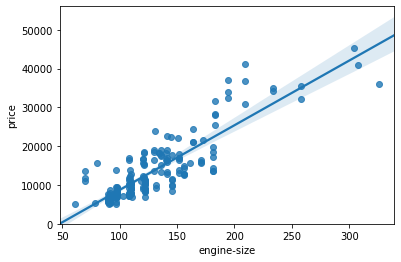

In [5]:
# Relationship between Engine Size and Price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

In [6]:
# Correlation between engine size and price
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Categorical Variable

Categorical variable is non-numerical variable that describe a characteristic of data unit.

<AxesSubplot:xlabel='body-style', ylabel='price'>

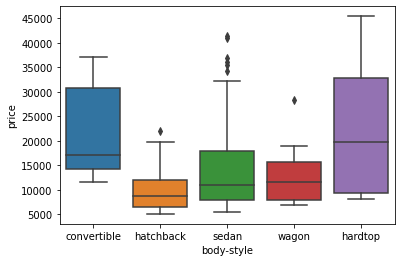

In [7]:
sns.boxplot(x="body-style",y="price",data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

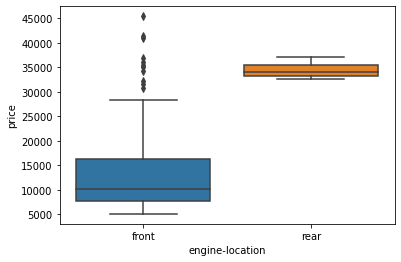

In [8]:
sns.boxplot(x="engine-location", y="price", data=df)

### Summary Statistics

Use describe function to compute basic summary statistics

In [9]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [10]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


Use `value_counts` to display how many units of each characteristic there are in a variable

In [11]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


### Group_By

The `groupby` method groups data by different categories. After run the function, the data is grouped based on specified variables. The following analysis is performed on the individual groups. 

In [12]:
df_group_one = df[['drive-wheels','body-style','price']]

In [13]:
# Calculate the average price for each group 
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


Group by multiple variables and calculate mean values for each combinations

In [14]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


Convert this groped data into a pivot table

In [15]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Now notice NaN. Replace missing data with 0.

In [16]:
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Use a heat map to visualize the relationship bewteen a predictor variables (drive wheel and Body Style) and a target variable (Price). It displays how the `price` is related to `drive-wheel` and `body-style`.

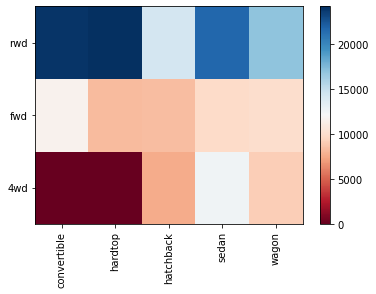

In [17]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Correlation 

**Pearson correlation** is used to measure the linear dependence bewteen X and Y. Pearson is the default method of the function `corr`.\
The value of coefficient is between -1 and 1.

**P-Value** is the probability that measures the correlation is statistically significant or not.\
The standard significant level is 0.05 (5%), which means that 95% confidence level of the correlation between the variables is significant.

In [18]:
# import stats module fro scipy library
from scipy import stats


Calculate the Pearson Correlation Coefficient and P-Value.

In [19]:
# wheel-base and price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("the pearson correlation is", pearson_coef, "p-value is", p_value)

the pearson correlation is 0.584641822265508 p-value is 8.076488270733218e-20


Since the p-value is less than 0.05, the correlation between wheel-base and price is statistically significant. But the linear relationship is not very strong according to the pearson correlation value.

### Analysis of Variance

ANOVA is a method used to test whether there are significant differences between the means of two or more groups.\
ANOVA analyzes the differece between groups of the same variable, therefore the groupby function will be necessary.\
**F-Test Score** A larger score means there is a larger difference bewteen the means, and more likely it is that the variation caused by the independent variable is true and not due to chance.\
**P-value** tells statistically significant or not.

**If the price is strongly correlated with the variable, ANOVA should return a noticible F-test score and a small p-value.**

#### Drive Wheels example

"rwd" "fwd" "4wd"

In [20]:
# group by drive wheels
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [21]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [22]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [23]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


The results show a strong correlation and statistical significance. But we need to look further into this analysis by looking at each group separately.

In [24]:
# fwd & rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print("Anova results: F=", f_val, "P =", p_val)

Anova results: F= 130.5533160959111 P = 2.2355306355677845e-23


In [25]:
# 4wd & rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [26]:
# 4wd & fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


**Conclusion:** [4wd & fwd] The p-value is very high. That means its F-test score is not very statistically significant. That leads to the conclusion that we cannot reject the assumption that the means of these two groups are the same. We cannot conclude the difference in correlation to be significant.  

# 2. Regression

Load the modules for Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
# Create An Object for Linear Regression:
lm = LinearRegression()

## Simple Linear Regression

In [29]:
# Assign variables, X, Y:
X = df[['highway-mpg']]
Y = df['price']

In [30]:
# Fit Linear Model:
lm.fit(X,Y)

LinearRegression()

In [31]:
# Output A Prediction:
y_hat = lm.predict(X)
y_hat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

## Multiple Linear Regression

In [32]:
# Create a String for Multiple Variables:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [33]:
lm.fit(Z,df['price'])

LinearRegression()

In [34]:
# Output A Prediction
y_hat_2 = lm.predict(Z)
y_hat_2[0:4]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015])

### Model Evaluation - Visualization

Import the visualization package, Seaborn:

In [35]:
import seaborn as sns
%matplotlib inline

### Regression Plot:
Visualize 'highway-mpg' as a predictor variable of price:

(0.0, 48287.67494633266)

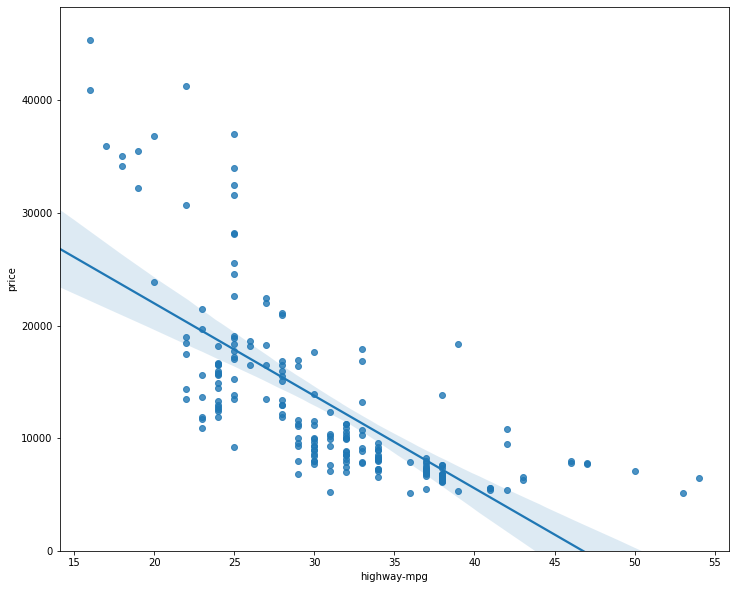

In [36]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

Visualize 'peak-mpg' as a predictor variable of price:

(0.0, 47414.1)

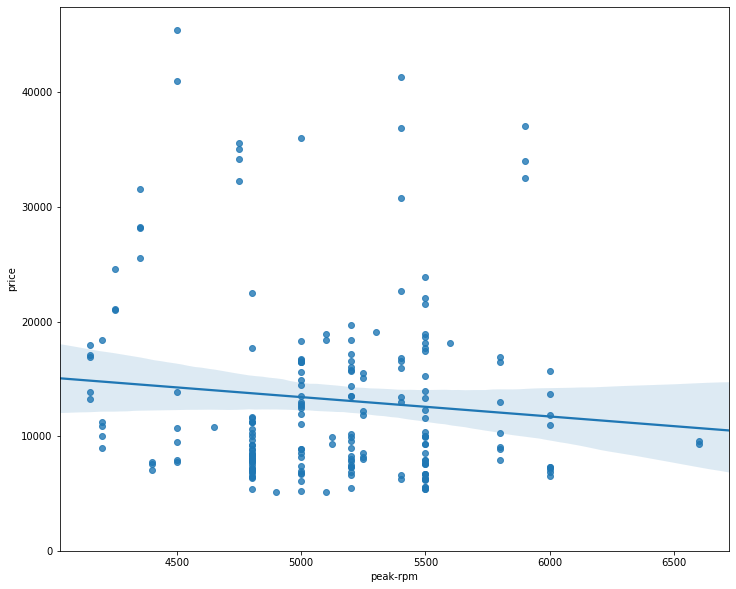

In [37]:
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

Compare correlations between variables:

In [38]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

A residual plot shows the residuals on the vertical y-axis and\
the independent variable on the horizontal x-axis.\
In residual plot, we look at the spread of the residuals.\
If the points are randomly spread out around the x-axis, then\
a linear model is appropriate for the data.\
Randomly spread out means that the variance is constant, thus\
the linear model is a good fit.

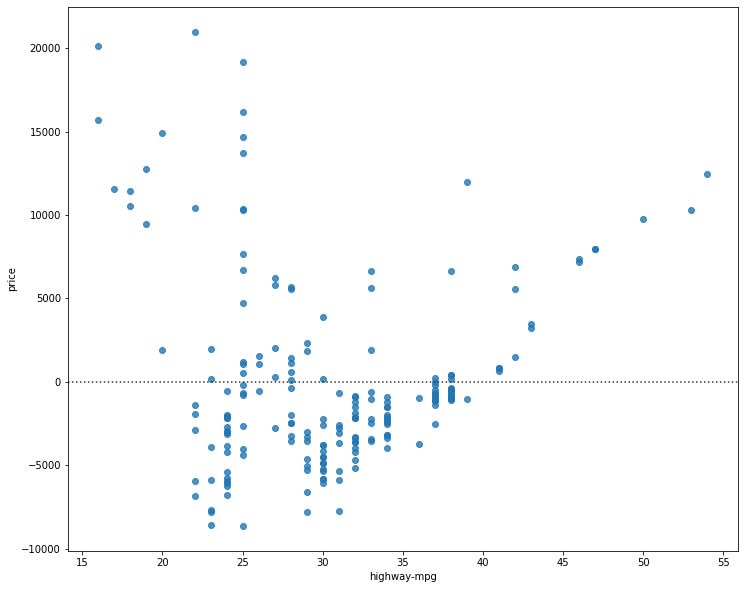

In [39]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

Plot above: a non-linear model is more appropriate for this data.

### Multiple Linear Regression

Make a distribution plot to look at fitted values compared to the actual values

In [40]:
# first run the prediction of Z
y_hat = lm.predict(Z)

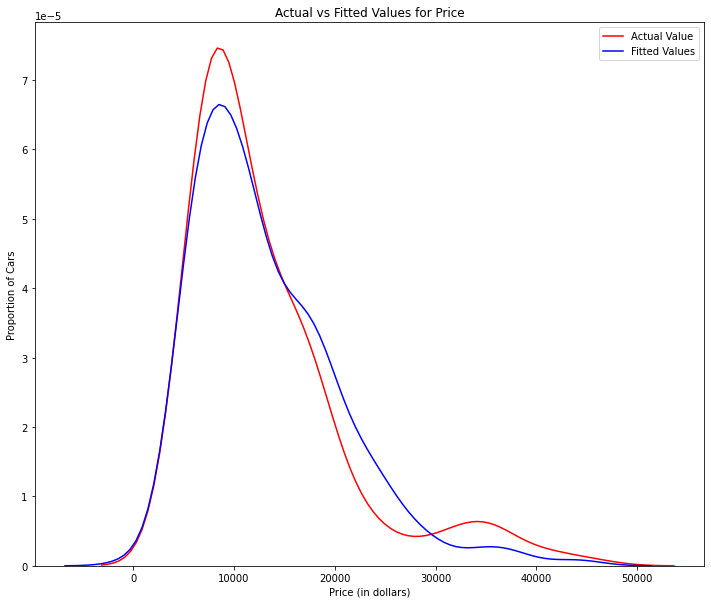

In [41]:
# Create a Distribution Plot
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


### Polynomial & Pipeline

In [42]:
# Create A Function To Plot Data:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [43]:
# Set Variables of x and y:
x = df['highway-mpg']
y = df['price']

Fit polynomial using the function `polyfit` - 3rd Order (Cubic)

In [44]:
# Fit polynomial using the function `polyfit` - 3rd Order (Cubic)
f = np.polyfit(x,y,3) # Fit
p = np.poly1d(f) # Display the function
print(p)


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Plot the function above:

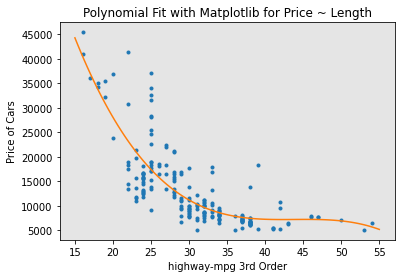

In [45]:
PlotPolly(p,x,y,'highway-mpg 3rd Order')

Fit polynomial using the function `polyfit` - 4th Order 

In [46]:
f4 = np.polyfit(x,y,4)
p4 = np.poly1d(f4)
print(p4)

         4        3       2
0.02651 x - 5.17 x + 382 x - 1.267e+04 x + 1.657e+05


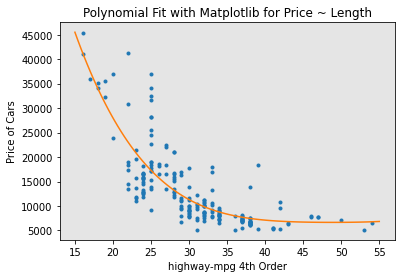

In [47]:
PlotPolly(p4,x,y,'highway-mpg 4th Order')

### Transform Polynomial functions

Import PolynomialFeatures module:

In [48]:
from sklearn.preprocessing import PolynomialFeatures

Create a PolynomialFeatures object of Degree 2

In [49]:
# Create a new object
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [50]:
Z_pr = pr.fit_transform(Z)

In [51]:
Z_pr.shape

(201, 15)

In [52]:
Z.shape

(201, 4)

## Pipelines

Data Pipelines simplify the steps of processing the data.

Import Pipeline and StandardScaler modules:

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Create the pipeline by creating a list of tuples including the name of model\
and its corresponding constructor.

In [54]:
# pipeline tuple
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Input the pipeline tuple to the pipeline constructor:

In [55]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

NOTE: `StandardScaler` only takes float inputs

In [56]:
# Convert the data type Z to type float
Z = Z.astype(float)

Normalize the data, perform a transform and fit model all at once!

In [57]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Normalize the data, perform a transform and produce a prediction all at once!

In [58]:
y_pipe = pipe.predict(Z)

In [59]:
y_pipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [60]:
y[0:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

## Evaluation Metrics

R-Squared (The goodness of fit)\
Mean Squared Error (MSE) measures the average of the squared of the residuals (errors). MSE is a risk function, corresponding to the expected value of the squared error loss. 

### Model 1: Simple Linear Regression

Calculate R^2

In [61]:
lm.fit(X,Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Calculate the MSE

Import the function mean_squared_error from metrics module:

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
Y_hat=lm.predict(X)
print('The output of the first 4 predicted values: ', Y_hat[0:4])

The output of the first 4 predicted values:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [64]:
mse = mean_squared_error(df['price'], Y_hat)
print('The MSE of price and predicted value is:', mse)

The MSE of price and predicted value is: 31635042.944639888


### Model 2: Multiple Linear Regression

Calculate R^2

In [65]:
# fit the model
lm.fit(Z, df['price'])
# find the R^2
lm.score(Z,df['price'])

0.8093562806577457

Calculate the MSE

First, produce the prediction

In [66]:
Y_pred_multi = lm.predict(Z)

Compare the predicted values with actual values:

In [67]:
mean_squared_error(df['price'], Y_pred_multi)

11980366.87072649

### Model 3: Polynomial Fit

Calculate R^2

Import function `r2_score` from metrics module

In [68]:
from sklearn.metrics import r2_score

In [69]:
r_squared = r2_score(y, p(x))
print('R^2 value is:', r_squared)

R^2 value is: 0.674194666390652


Calculate MSE

In [70]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### Prediction and Decision Making

In [71]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [72]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [73]:
lm.fit(X,Y)
lm

LinearRegression()

In [74]:
y_hat = lm.predict(new_input)
y_hat[0:5]

c:\Users\yukam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

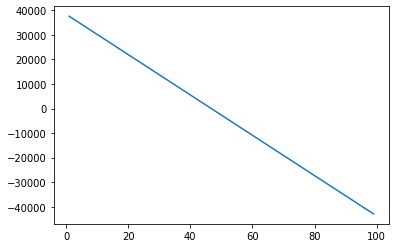

In [75]:
# plot actual value and predicted value
plt.plot(new_input, y_hat)
plt.show()

### Linear Baseline 
R^2 0.4965911884339176\
MSE 31635042.944639888

### Multiple 
R^2 0.8093562806577457\
MSE 11980366.87072649

### Poly
R^2 0.674194666390652\
MSE 20474146.426361218

# 3. Model Evaluation and Fine Tuning

Load Interact function from ipywidgets module

In [76]:
from ipywidgets import interact, interactive, fixed, interact_manual

Define distribution plot and polynomial plot functions

In [77]:
# define distribution plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [78]:
# define Polynomial Plot
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

First, we'll extract only numeric data:

In [79]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


## Training and Testing

Note: We need to set aside a Validation data, but in this tutorial, we will only use Training and Testing data for demonstration purposes. 

First, we will place the target variable (dependent variable) in the seperate data frame **y_data**

In [80]:
y_data = df['price']

Then, we will take out the 'price' variable from the main data to create **x_data**

In [81]:
x_data = df.drop('price', axis=1)

Load train_test_split function from model_selection module.

In [82]:
from sklearn.model_selection import train_test_split

Split both data sets into training and testing data sets (10% Testing Size)

In [83]:
# test size = 10 %, train size = 90% of total dataset
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state=1)
print("# of test samples (10%):", x_test.shape[0])
print("# of train sample (10%):", x_train.shape[0])

# of test samples (10%): 21
# of train sample (10%): 180


Split both data sets into training and testing data sets (40% Testing size)

In [84]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("# of test samples (40%) :", x_test1.shape[0])
print("# of training samples (40%):",x_train1.shape[0])

# of test samples (40%) : 81
# of training samples (40%): 120


Bring in LinearRegression class from linear_model module

In [85]:
from sklearn.linear_model import LinearRegression

Create a Linear Regression object:

In [86]:
lre = LinearRegression()

Simple Linear Regression: use the feature "horsepower"

In [87]:
# 90% train
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

Calculate R^2 for the goodness of fit on test set

In [88]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [89]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

Run the same algorithm with 60% train 40 % test

In [90]:
# 60 % train
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

R^2 score improved from 10% test to 40% test set. 10% test set only includes 21 observations, and that is not sufficient size to run a test on training algorithm. 

## Cross-Validation

Import cross_val_score function from model_selection module

In [91]:
from sklearn.model_selection import cross_val_score

Run cross_val_score function with folding = 4. Set the same feature 'horsepower' and the same target variable.

In [92]:
# folding = 4
R_cross = cross_val_score(lre,x_data[['horsepower']], y_data, cv= 4)
R_cross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [93]:
print("R^2 cross val mean: ", R_cross.mean())
print("R^2 cross val std", R_cross.std())

R^2 cross val mean:  0.522009915042119
R^2 cross val std 0.2911839444756029


negative squared error

In [94]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.7224759 ])

Experiment with folding = 2

In [95]:
R_cross2 = cross_val_score(lre,x_data[['horsepower']], y_data, cv= 2)

In [96]:
R_cross2.mean()

0.5166761697127429

In [97]:
R_cross2.std()

0.07348004195771385

Import cross_val_predict function from model_selection module

In [98]:
from sklearn.model_selection import cross_val_predict

Use cross_val_predict and set the feature as 'horsepower' and the folding = 4

In [99]:
y_hat = cross_val_predict(lre,x_data[['horsepower']], y_data, cv= 4)
y_hat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Overfitting & Underfitting

Import seaborn and matplotlib library for plotting

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Using Multiple Linear Regression objects

In [101]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

Prediction using training data

In [102]:
# predict
y_hat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_hat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

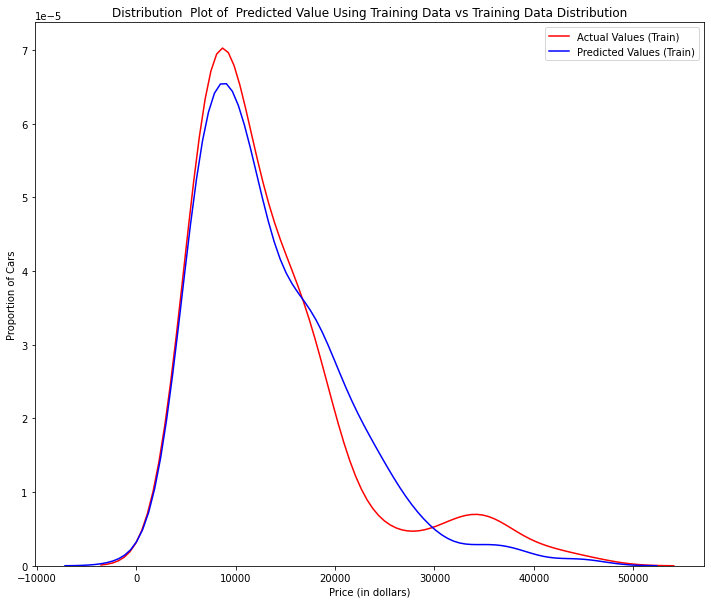

In [103]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_hat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution

Prediction using testing data

In [104]:
y_hat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_hat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

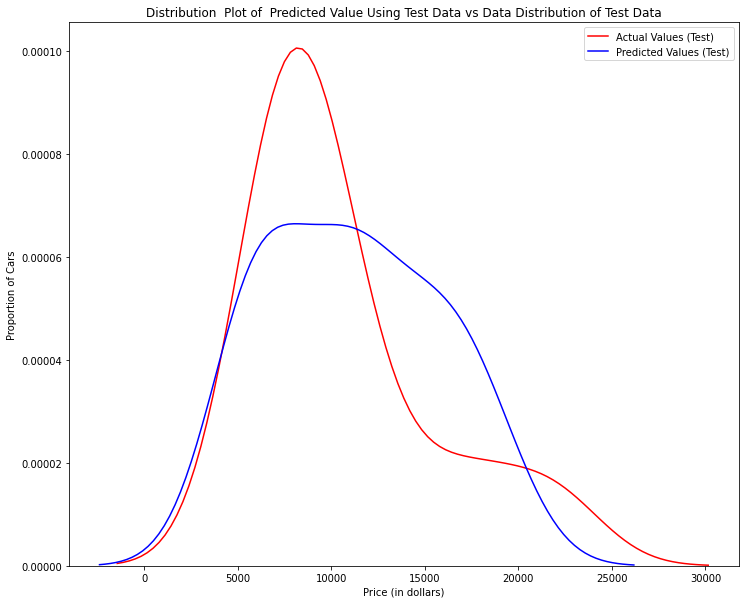

In [105]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,y_hat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data

#### Using Polynomial Function

In [106]:
# Import PolynomialFeatures function from preprocessing module
from sklearn.preprocessing import PolynomialFeatures

This example, we will split 45 % for testing and 55 % for training.

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will use degree = 5 polynomial transformation on 1 feature.

In [108]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

Create Linear Regression object

In [109]:
poly = LinearRegression()

Train the model using poly object

In [110]:
poly.fit(x_train_pr, y_train)

LinearRegression()

Output the prediction using poly fit model

In [111]:
y_hat_poly = poly.predict(x_test_pr)
y_hat_poly[0:5]

array([ 6728.65566037,  7307.9878638 , 12213.7877412 , 18893.24796457,
       19995.95185894])

In [112]:
print("Poly predicted values:", y_hat_poly[0:5])
print("True values:", y_test[0:5].values)

Poly predicted values: [ 6728.65566037  7307.9878638  12213.7877412  18893.24796457
 19995.95185894]
True values: [ 6295. 10698. 13860. 13499. 15750.]


We will use PollyPlot functions to visually inspect how the prediction (polly) model is fitting in training and testing data.

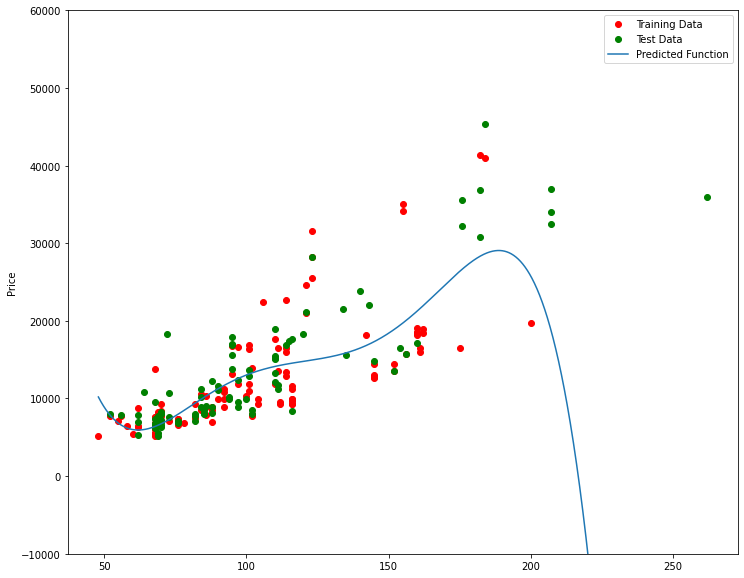

In [113]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figure 3: Polynomial regression model with training and testing data

Calculate R^2 for the poly training data:

In [114]:
poly.score(x_train_pr, y_train)

0.5567716902121724

Calculate R^2 for the poly Testing data:

In [115]:
poly.score(x_test_pr, y_test)

-29.87134054062532

R^2 in negative value for testing data. That could be a sign for overfitting. 

Text(3, 0.75, 'Maximum R^2 ')

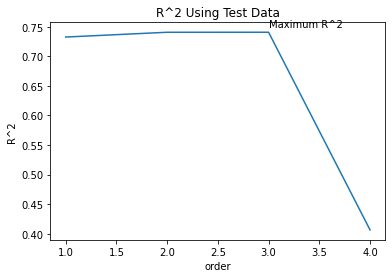

In [116]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

Figure 4: R^2 values with different polynomial orders

Experiment with different polynomial orders and different ratio of test data.

In [117]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [118]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Figure 5: The Interactive Plot Displaying Training and Testing Data and Predicted Model for the feature 'horsepower' and Price

#### Use Polynomial Functions with Multiple Features

In [119]:
# degree = 2
pr1 = PolynomialFeatures(degree=2)

Transform the training and testing sets for the multiple features

In [120]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])
pr1

PolynomialFeatures()

New dimension after poly transformation

In [121]:
x_train_pr1.shape
x_test_pr1.shape

(91, 15)

Create a new Linear Regression object

In [122]:
poly1 = LinearRegression()

Train the poly object using the Linear Regression object

In [123]:
poly1.fit(x_train_pr1, y_train)

LinearRegression()

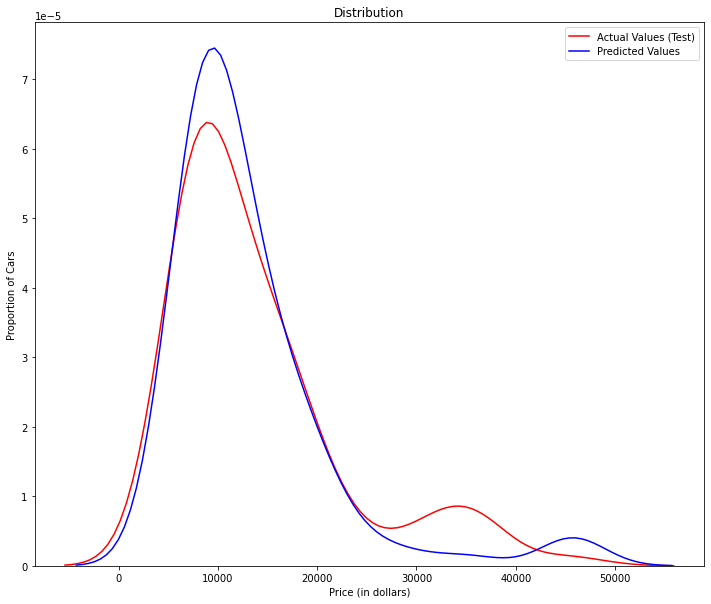

In [124]:
y_hat_1 = poly1.predict(x_test_pr1)
DistributionPlot(y_test, y_hat_1, "Actual Values (Test)", "Predicted Values", "Distribution")

Figure 6: The predicted value is higher than the actual value around the peak (price $10,000), but the predicted value goes lower than the actual value around $30,000 - $40,000. It shows that polynomial model might not be the best fit model. 

## Ridge Regression

Ridge Regression enhances regular linear regression by slightly changing its cost function, which will result in less overfit models. It is also a method of estimating the coefficients of multi-regression models where multicollinearity is being detected. 

Pros: Ability to produce a lower test mean squared error (MSE) compared to least squares regression when multicollinearity is present.
Cons: Inability to perform variable selection because it includes all predictor variables in the final model. 

Import Ridge function from linear_model module

In [125]:
from sklearn.linear_model import Ridge

Create Polynomial transformation (degree = 2) with selected features (predictors x)

In [126]:
pr = PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Create Ridge regression object with parameter alpha = 1

In [127]:
RidgeModel = Ridge(alpha=1)

Train and output the prediction using Ridge Model

In [128]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [129]:
y_hat_ridge = RidgeModel.predict(x_test_pr)
print('Ridge predicted:', y_hat_ridge[0:4])
print('Test set:', y_test[0:4].values)

Ridge predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
Test set: [ 6295. 10698. 13860. 13499.]


Select a value of Alpha (hyperparameter) that minimize the error.

In [130]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:02<00:00, 451.47it/s, Test Score=0.564, Train Score=0.859]


### Grid Search

Run a cross validation to find the most optimized value of alpha (hyperparameter)

In [131]:
from sklearn.model_selection import GridSearchCV

Create alpha and save it into dictionary object

In [132]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object (estimator)

In [133]:
RM = Ridge()
RM

Ridge()

Create a Grid Search object (cv=4)

In [134]:
Grid1 = GridSearchCV(RM, parameters1, cv=4)
Grid1

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

Fit the ridge model and output the prediction

In [135]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

Use best_estimator_ to calculate the best optimized value of alpha

In [136]:
BestAlpha = Grid1.best_estimator_
BestAlpha

Ridge(alpha=10000)

Calculate R^2 to evaluate the goodness of fit 

In [137]:
BestAlpha.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

In [138]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']], y_data)
BestAlpha2 = Grid1.best_estimator_
BestAlpha2.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']], y_test)

0.841148411617957

## END